#Sentiment Analysis in Python
###1)In this notebook we will be doing some sentiment analysis in python using two different techniques:

###2)VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
###3)Roberta Pretrained Model from Huggingface
###4)Huggingface Pipeline

#Step 0. Load Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('ggplot')

import nltk

In [ ]:
datasetPath = "/content/Reviews.csv"
df = pd.read_csv(datasetPath)
df = df.head(500)

In [ ]:
print(df.shape)
df.head()

(500, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Quick EDA

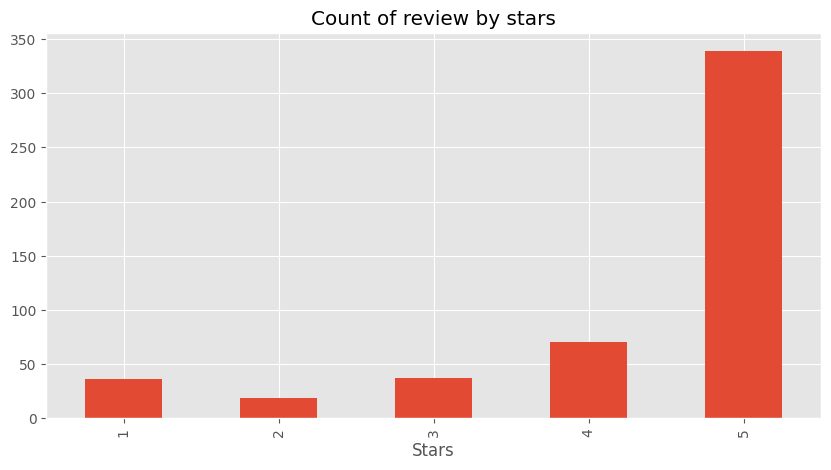

In [ ]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of review by stars',
          figsize=(10,5))
ax.set_xlabel('Stars')
plt.show()
# A lot more 5 stars compared to others

Basic NLTK

In [ ]:
reviews = df['Text']
text = reviews[10]
text

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [ ]:
import nltk
nltk.download('punkt')
tokens = nltk.word_tokenize(text)
tokens = tokens[:10]
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

In [ ]:
!pip install nltk
!python -m nltk.downloader averaged_perceptron_tagger

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [ ]:
!python -m nltk.downloader maxent_ne_chunker

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Step 1. VADER Seniment Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sia.polarity_scores("This is very nice dish!") # lies in [-1,1], higher meaning positive

{'neg': 0.0, 'neu': 0.542, 'pos': 0.458, 'compound': 0.5244}

In [ ]:
sia.polarity_scores(text) # predicts quite positive which is the case

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [ ]:
# Computing polarity scores on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id',
                                              'neg': 'VaderNeg',
                                              'neu': 'VaderNeu',
                                              'pos': 'VaderPos',
                                              'compound': 'VaderCompound'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,VaderNeg,VaderNeu,VaderPos,VaderCompound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Plot Vader result

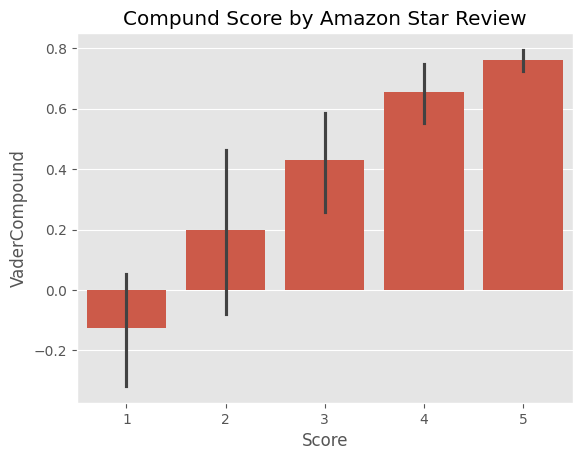

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='VaderCompound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

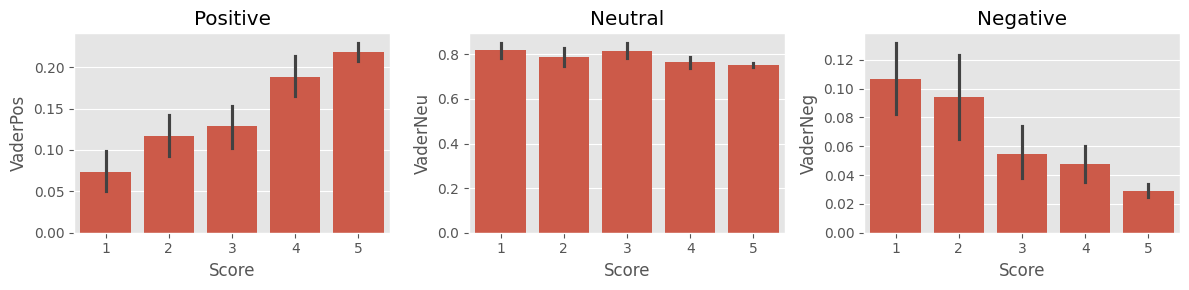

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='VaderPos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='VaderNeu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='VaderNeg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Step 3. Roberta Pretrained Model

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on text
print(text)
sia.polarity_scores(text)

I don't write very many reviews but I have to say that Kettle Brand chips are the best I have ever tasted.  Every flavor is dynamite.  If you are feeling iffy about honey dijon, I would recommend cheddar beer, absolutely amazing.  And they're healthy!  (besides a lil fat)  I have eaten a lot of chips in my day and Kettle takes the cake.  Enjoy, and don't eat them too fast.


{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9811}

In [ ]:
# Roberta results on text
encoded_text = tokenizer(text, return_tensors='pt')
# The ** syntax before encoded_text unpacks the contents of this dictionary into individual keyword arguments
# when calling the model. This means that instead of passing the entire dictionary as a single argument,
# each key-value pair within the dictionary becomes a separate argument to the model's __call__ method.
scores = model(**encoded_text)
scores

SequenceClassifierOutput(loss=None, logits=tensor([[-2.2464, -0.7111,  3.7556]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
scores = scores[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'RobertaNeg' : scores[0],
    'RobertaNeu' : scores[1],
    'RobertaPos' : scores[2]
}
print(scores_dict)

{'RobertaNeg': 0.0024397594, 'RobertaNeu': 0.011327226, 'RobertaPos': 0.986233}


In [ ]:
def roberta_polarity_scores(example):
    encoded_text = tokenizer(text, return_tensors='pt')
    scores = model(**encoded_text)
    scores = scores[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'RobertaNeg' : scores[0],
        'RobertaNeu' : scores[1],
        'RobertaPos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        res[myid] = roberta_polarity_scores(text)
    except RuntimeError:
        print(f'Broke for id {myid}')
res

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


{1: {'RobertaNeg': 0.009624243,
  'RobertaNeu': 0.049980447,
  'RobertaPos': 0.9403953},
 2: {'RobertaNeg': 0.5089859,
  'RobertaNeu': 0.45241374,
  'RobertaPos': 0.038600408},
 3: {'RobertaNeg': 0.0032289,
  'RobertaNeu': 0.09806747,
  'RobertaPos': 0.8987037},
 4: {'RobertaNeg': 0.0022951253,
  'RobertaNeu': 0.09021916,
  'RobertaPos': 0.90748566},
 5: {'RobertaNeg': 0.0016347291,
  'RobertaNeu': 0.0103024645,
  'RobertaPos': 0.98806286},
 6: {'RobertaNeg': 0.0061295927,
  'RobertaNeu': 0.021795867,
  'RobertaPos': 0.97207457},
 7: {'RobertaNeg': 0.0013047527,
  'RobertaNeu': 0.007773783,
  'RobertaPos': 0.99092144},
 8: {'RobertaNeg': 0.002029357,
  'RobertaNeu': 0.0056852014,
  'RobertaPos': 0.9922854},
 9: {'RobertaNeg': 0.0038735785,
  'RobertaNeu': 0.09415622,
  'RobertaPos': 0.9019702},
 10: {'RobertaNeg': 0.0031034567,
  'RobertaNeu': 0.05591218,
  'RobertaPos': 0.9409843},
 11: {'RobertaNeg': 0.0191341,
  'RobertaNeu': 0.07104441,
  'RobertaPos': 0.9098215},
 12: {'RobertaNeg

In [ ]:
roberta = pd.DataFrame(res).T
roberta = roberta.reset_index().rename(columns={'index': 'Id'})
results_df = roberta.merge(vaders, how='left')
results_df.head()

,Id,RobertaNeg,RobertaNeu,RobertaPos,VaderNeg,VaderNeu,VaderPos,VaderCompound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.009624,0.049980,0.940395,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.038600,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
results_df.columns

Index(['Id', 'RobertaNeg', 'RobertaNeu', 'RobertaPos', 'VaderNeg', 'VaderNeu',
       'VaderPos', 'VaderCompound', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

#Compare both models

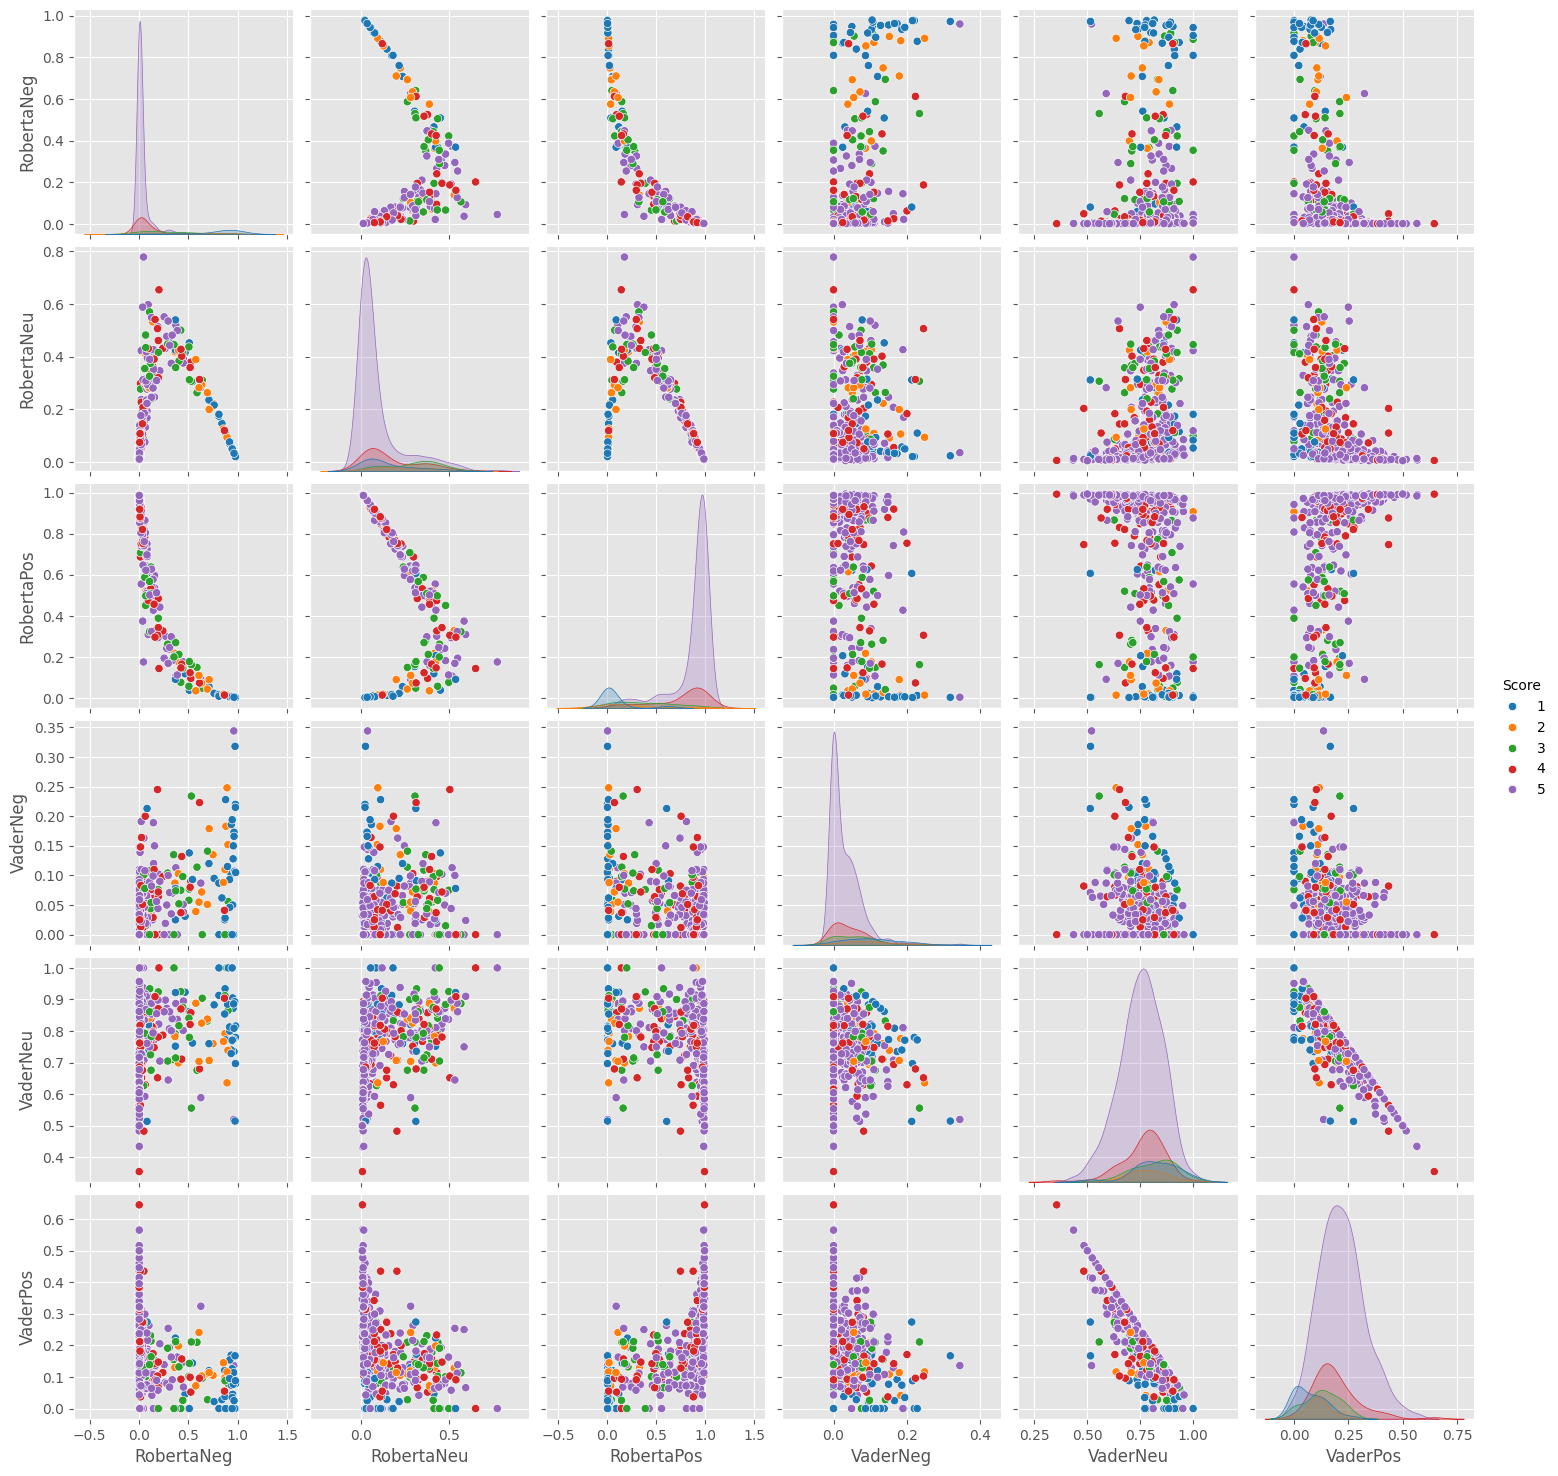

In [ ]:
sns.pairplot(data=results_df,
             vars=['RobertaNeg', 'RobertaNeu', 'RobertaPos',
                   'VaderNeg', 'VaderNeu', 'VaderPos'],
             hue='Score',
             palette='tab10')

plt.show()

Step 4: Review Examples:                

In [ ]:
results_df.query('Score == 1') \
    .sort_values('RobertaPos', ascending=False)[['Text','RobertaPos', 'RobertaNeg', 'RobertaNeu']].values[0]

array(['I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.',
       0.6256365776062012, 0.05961424484848976, 0.314749151468277],
      dtype=object)

In [ ]:
results_df.query('Score == 1') \
    .sort_values('VaderPos', ascending=False)[['Text','VaderPos', 'VaderNeg', 'VaderNeu', 'VaderCompound']].values[0]

array(['So we cancelled the order.  It was cancelled without any problem.  That is a positive note...',
       0.274, 0.213, 0.514, 0.3185], dtype=object)

In [ ]:
# negative sentiment 5-Star view
results_df.query('Score == 5') \
    .sort_values('RobertaNeg', ascending=False)[['Text','RobertaPos', 'RobertaNeg', 'RobertaNeu']].values[0]

array(['this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault',
       0.004412972368299961, 0.9601579308509827, 0.035429105162620544],
      dtype=object)

In [ ]:
results_df.query('Score == 5') \
    .sort_values('VaderNeg', ascending=False)[['Text','VaderPos', 'VaderNeg', 'VaderNeu', 'VaderCompound']].values[0]

array(['this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault',
       0.136, 0.344, 0.52, -0.7345], dtype=object)

Extra: The Transformers Pipeline

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
sentiment_pipeline('I love playing football.')

[{'label': 'POSITIVE', 'score': 0.9995589852333069}]

In [ ]:
sentiment_pipeline('I am not feeling well.')

[{'label': 'NEGATIVE', 'score': 0.9997661709785461}]

In [ ]:
sentiment_pipeline('I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money')

In [ ]:
sentiment_pipeline('this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault') # got it wrong too?

Topic Modelling

In [ ]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

In [ ]:
#Dependencies
import pandas as pd
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

In [ ]:
#create dictionary
df['clean_text_list'] = df['Text'].apply(lambda x: clean(x).split())
dictionary = corpora.Dictionary(df['clean_text_list'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

In [ ]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['clean_text_list'] ]
print(len(doc_term_matrix))

In [ ]:
lda = gensim.models.ldamodel.LdaModel

In [ ]:
num_topics=3
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

In [ ]:
ldamodel.print_topics(num_topics=num_topics)

In [ ]:
# Assigns the topics to the documents in corpus
lda_corpus = ldamodel[doc_term_matrix]

In [ ]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [ ]:
[doc for doc in lda_corpus]

In [ ]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

In [ ]:
cluster1 = [j for i,j in zip(lda_corpus,df.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,df.index) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,df.index) if i[2][1] > threshold]

print(len(cluster1))
print(len(cluster2))
print(len(cluster3))

In [ ]:
df.iloc[cluster1]

In [ ]:
df.iloc[cluster2]

In [ ]:
df.iloc[cluster3]

#Part of speech Tagging

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import ngrams, FreqDist
from nltk.stem import PorterStemmer
import spacy
from spacy import displacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def visualize_pos(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Create a list of dictionaries for each token in the text
    ents = [{"start": token.idx, "end": token.idx + len(token.text), "label": token.pos_} for token in doc]

    # Create a dictionary representing the processed text
    processed_doc = {"text": text, "ents": ents}

    # Define color options for different POS tags
    colors = {"PRON": "blueviolet", "VERB": "lightpink", "NOUN": "turquoise",
              "ADJ": "lime", "ADP": "khaki", "ADV": "orange", "CONJ": "cornflowerblue",
              "DET": "forestgreen", "NUM": "salmon", "PART": "yellow"}

    options = {"ents": [token.pos_ for token in doc], "colors": colors}

    # Render the visualization
    displacy.render(processed_doc, style="ent", options=options, manual=True)

# Example usage
for text in reviews[:5]:  # Replace 'reviews' with your text list
    visualize_pos(text)